In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Ler o CSV enviado (ajuste o nome se necessário)
df = pd.read_csv("relacao_vento_cuc_semevp.csv", encoding='utf-8-sig', sep=';')

In [ ]:
def corrigir_azimute(azimute):
    try:
        # Remove caracteres não numéricos (exceto ponto e vírgula)
        azimute_str = str(azimute)
        azimute_str = azimute_str.replace("°", "").strip()
        return float(azimute_str)
    except:
        return None  # ou np.nan, se preferir

# Crie uma coluna numérica corrigida
df['AzimuteNum'] = df['Azimute/Curso'].apply(corrigir_azimute)

In [ ]:
def azimute_para_direcao(azimute):
    if azimute is None:
        return None
    setores = [
        (0, 22.5, 'N'), (22.5, 67.5, 'NE'), (67.5, 112.5, 'L'),
        (112.5, 157.5, 'SE'), (157.5, 202.5, 'S'), (202.5, 247.5, 'SO'),
        (247.5, 292.5, 'O'), (292.5, 337.5, 'NO'), (337.5, 360, 'N')
    ]
    for inicio, fim, direcao in setores:
        if inicio <= azimute < fim:
            return direcao
    return None

In [ ]:
# Aplicar a função
# Agora aplique sem erro
df['DirecaoCardeal'] = df['AzimuteNum'].apply(azimute_para_direcao)

In [ ]:
# 5. Converter CUC para numérico (caso leia como string)
df['CUC'] = pd.to_numeric(df['CUC'], errors='coerce')

In [ ]:
print("Valores únicos na coluna 'DirecaoCardeal':")
print(df['DirecaoCardeal'].unique())

print("\nValores únicos na coluna 'Sentido':")
print(df['Sentido'].unique())

Valores únicos na coluna 'DirecaoCardeal':
['N' 'S' 'SO' 'NE' 'L']

Valores únicos na coluna 'Sentido':
['N' 'S ' 'S' 'SO' 'NE' 'L']


In [ ]:
# Limpar a coluna 'Sentido' para remover espaços em branco
df['Sentido'] = df['Sentido'].str.strip()

# Verificar os valores únicos novamente após a limpeza
print("Valores únicos na coluna 'DirecaoCardeal' (após limpeza):")
print(df['DirecaoCardeal'].unique())

print("\nValores únicos na coluna 'Sentido' (após limpeza):")
print(df['Sentido'].unique())

Valores únicos na coluna 'DirecaoCardeal' (após limpeza):
['N' 'S' 'SO' 'NE' 'L']

Valores únicos na coluna 'Sentido' (após limpeza):
['N' 'S' 'SO' 'NE' 'L']


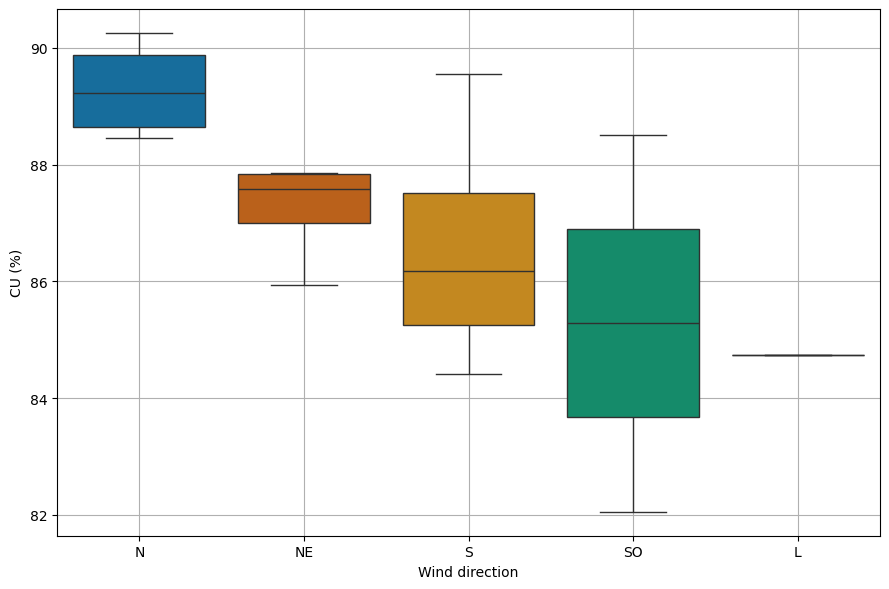

In [ ]:
# 6. Plotar o boxplot agrupado por direção cardeal
plt.figure(figsize=(9,6))
sns.boxplot(data=df, x='DirecaoCardeal', y='CUC', order=['N','NE','S','SO','L'], palette='colorblind', hue='DirecaoCardeal', legend=False)
plt.title("")
plt.ylabel("CU (%)")
plt.xlabel("Wind direction")
plt.grid(True)
plt.tight_layout()
plt.show()

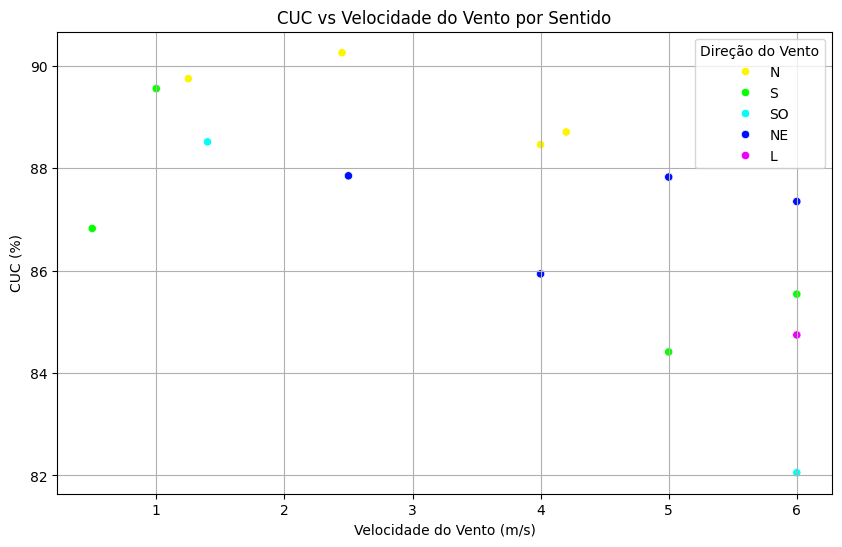

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Velocidade_Vento',  # ou o nome exato no seu CSV
    y='CUC',
    hue='Sentido',     # coluna com direções N, NE, etc.
    palette='hsv'
)
plt.title('CUC vs Velocidade do Vento por Sentido')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('CUC (%)')
plt.legend(title='Direção do Vento')
plt.grid(True)
plt.show()

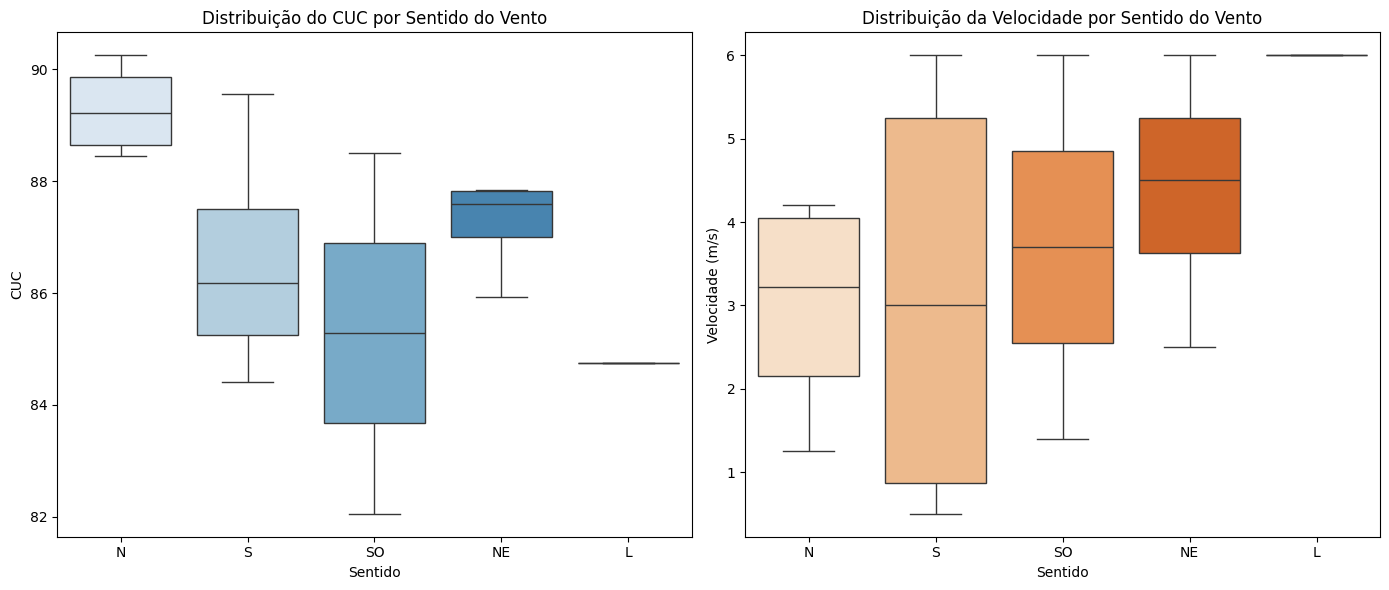

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

sns.boxplot(data=df, x='Sentido', y='CUC', ax=axes[0], palette='Blues', hue='Sentido', legend=False)
axes[0].set_title('Distribuição do CUC por Sentido do Vento')
axes[0].set_xlabel('Sentido')
axes[0].set_ylabel('CUC')

sns.boxplot(data=df, x='Sentido', y='Velocidade_Vento', ax=axes[1], palette='Oranges', hue='Sentido', legend=False)
axes[1].set_title('Distribuição da Velocidade por Sentido do Vento')
axes[1].set_xlabel('Sentido')
axes[1].set_ylabel('Velocidade (m/s)')

plt.tight_layout()
plt.show()

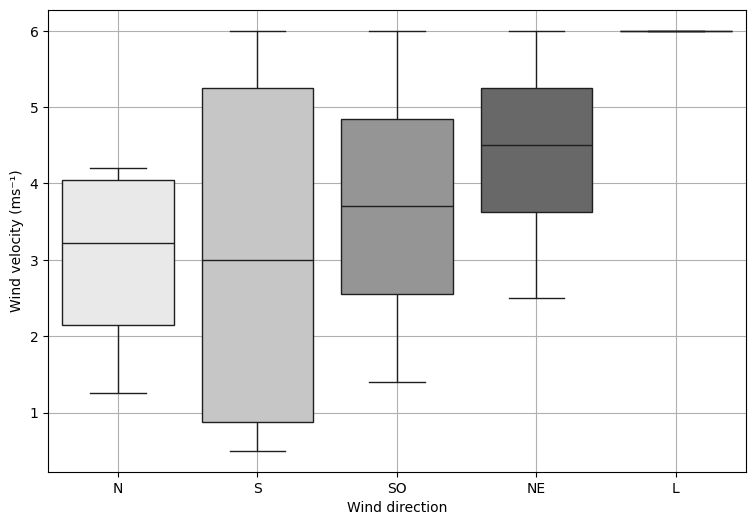

In [ ]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x='Sentido', y='Velocidade_Vento', palette='Greys', hue='Sentido', legend=False)
plt.title('')
plt.xlabel('Wind direction')
plt.ylabel('Wind velocity (ms⁻¹)')
plt.grid(True)
plt.show()

Dimensões da imagem salva: 2095 x 1195 pixels
DPI da imagem: (300.0, 300.0)
Largura em polegadas: 6.98 pol
✅ Largura dentro do limite (789-2250px)
✅ Altura dentro do limite (≤2625px)


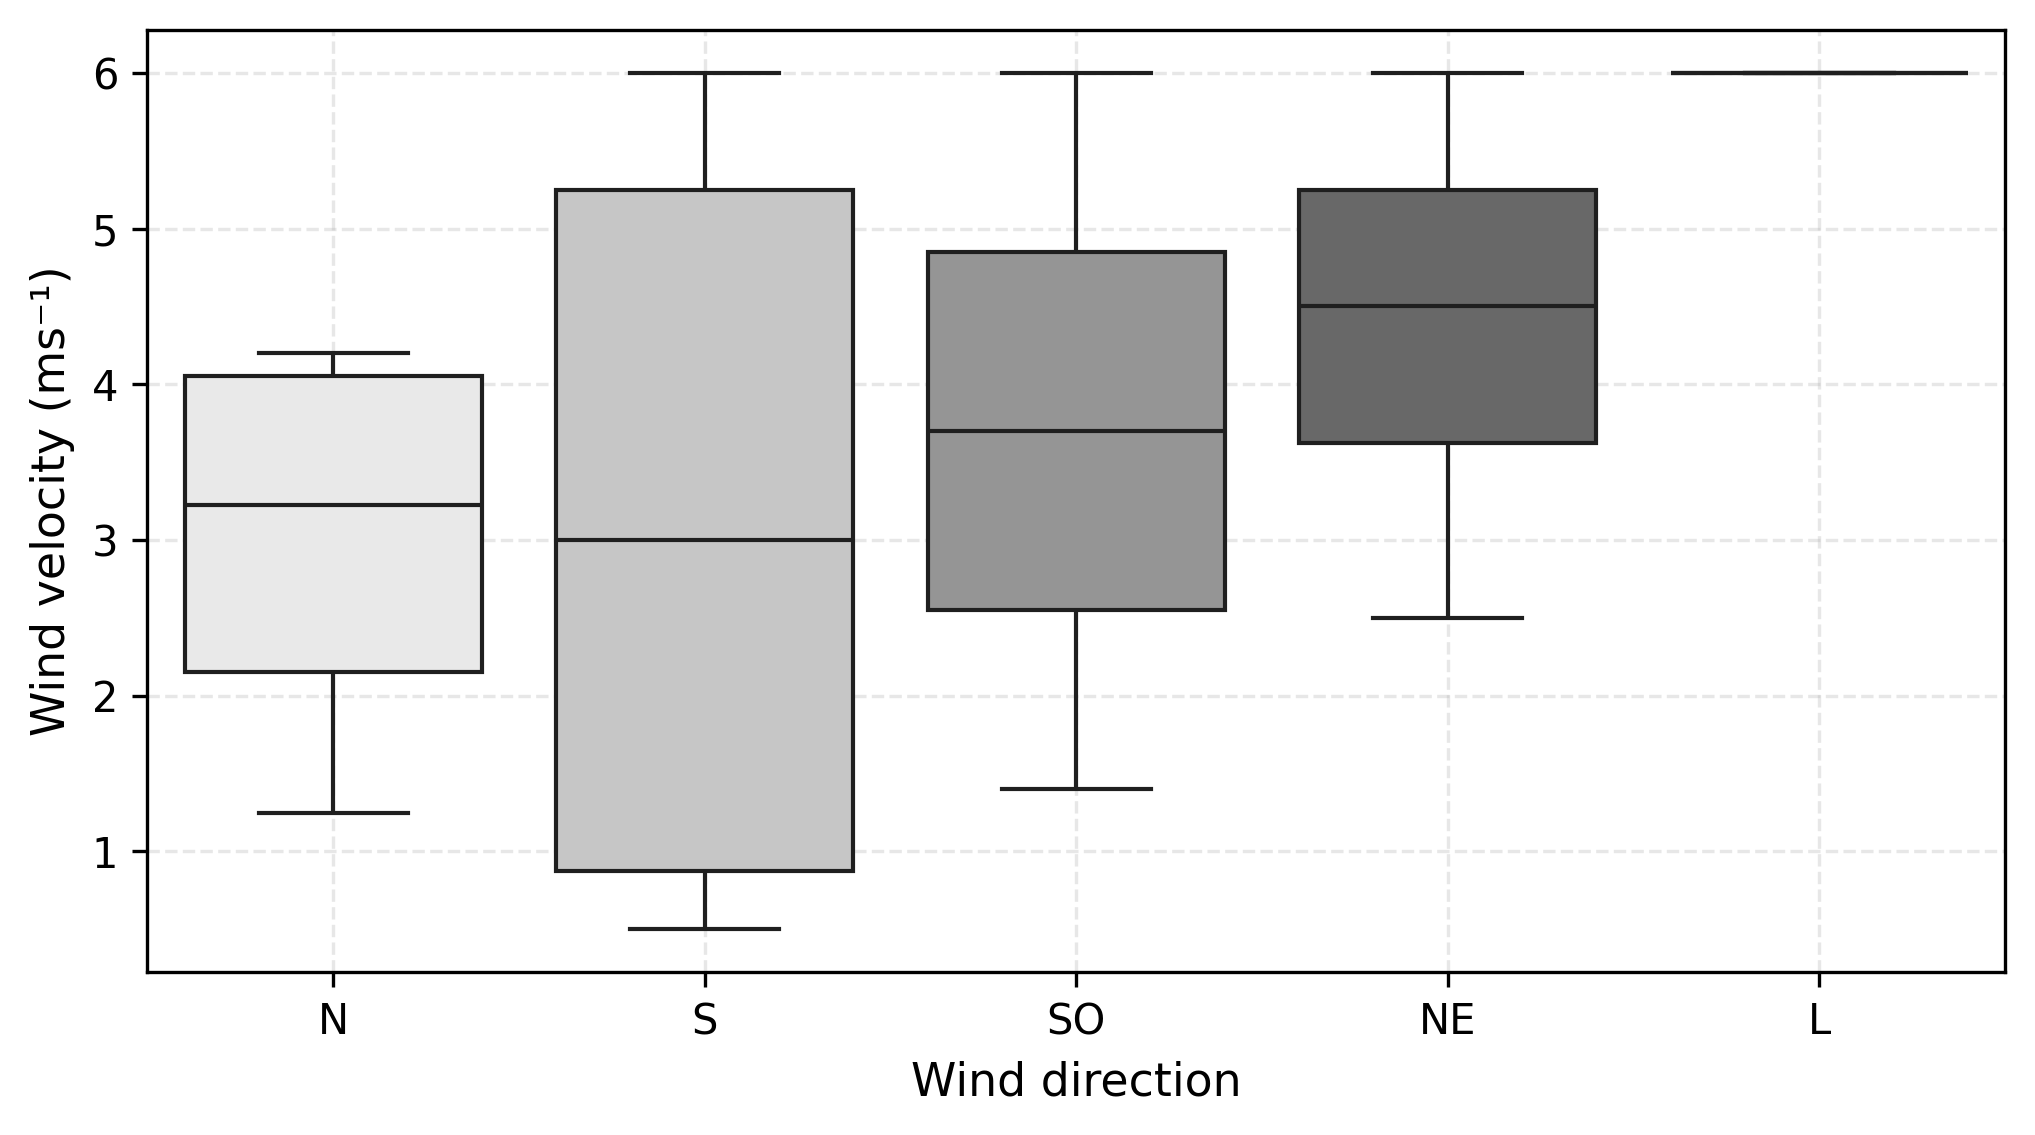

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import PIL.Image # Importar para verificação de imagem

# Dimensões e resolução (baseado nas especificações da revista)
# - Largura min: 789px / 300dpi = 2.63 pol (≈ 6.7cm)
# - Largura max: 2250px / 300dpi = 7.5 pol (≈ 19cm)
# - Altura max: 2625px / 300dpi = 8.75 pol (≈ 22.2cm)

# Dimensões recomendadas com margem de segurança
fig_width = 7.0  # polegadas (resulta em 2100px a 300dpi - dentro do limite!)
fig_height = 4.0  # polegadas (resulta em 1200px a 300dpi - dentro do limite!)

# Criar figura com dimensões controladas
plt.figure(figsize=(fig_width, fig_height), dpi=300, facecolor='white')

sns.boxplot(data=df, x='Sentido', y='Velocidade_Vento', palette='Greys', hue='Sentido', legend=False)
plt.title('')
plt.xlabel('Wind direction', fontsize=11)
plt.ylabel('Wind velocity (ms⁻¹)', fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout(pad=1.5) # Ajusta o layout para evitar cortes nos rótulos

# Salvar a figura em formato tif com 300 dpi
plt.savefig(
    'boxplot_velocidade_vento.tif',
    format='tif',
    dpi=300,
    bbox_inches='tight',  # IMPORTANTE: remove espaços em branco extras
    pad_inches=0.2,       # Padding controlado
    facecolor='white',    # Garantir fundo branco
    edgecolor='none',
    transparent=False # Alterado para False para evitar fundo transparente
)

# Opcional: Verificar as dimensões da imagem salva
img = PIL.Image.open('boxplot_velocidade_vento.tif')
width_px, height_px = img.size
print(f"Dimensões da imagem salva: {width_px} x {height_px} pixels")
print(f"DPI da imagem: {img.info.get('dpi', 'Não especificado')}")
print(f"Largura em polegadas: {width_px/300:.2f} pol")

# Verificar se está dentro dos limites da revista
if 789 <= width_px <= 2250:
    print("✅ Largura dentro do limite (789-2250px)")
else:
    print(f"⚠️  Largura fora do limite: {width_px}px")

if height_px <= 2625:
    print("✅ Altura dentro do limite (≤2625px)")
else:
    print(f"⚠️  Altura fora do limite: {height_px}px")

plt.show()

Dimensões da imagem salva: 2095 x 1195 pixels
DPI da imagem: (300.0, 300.0)
Largura em polegadas: 6.98 pol
✅ Largura dentro do limite (789-2250px)
✅ Altura dentro do limite (≤2625px)


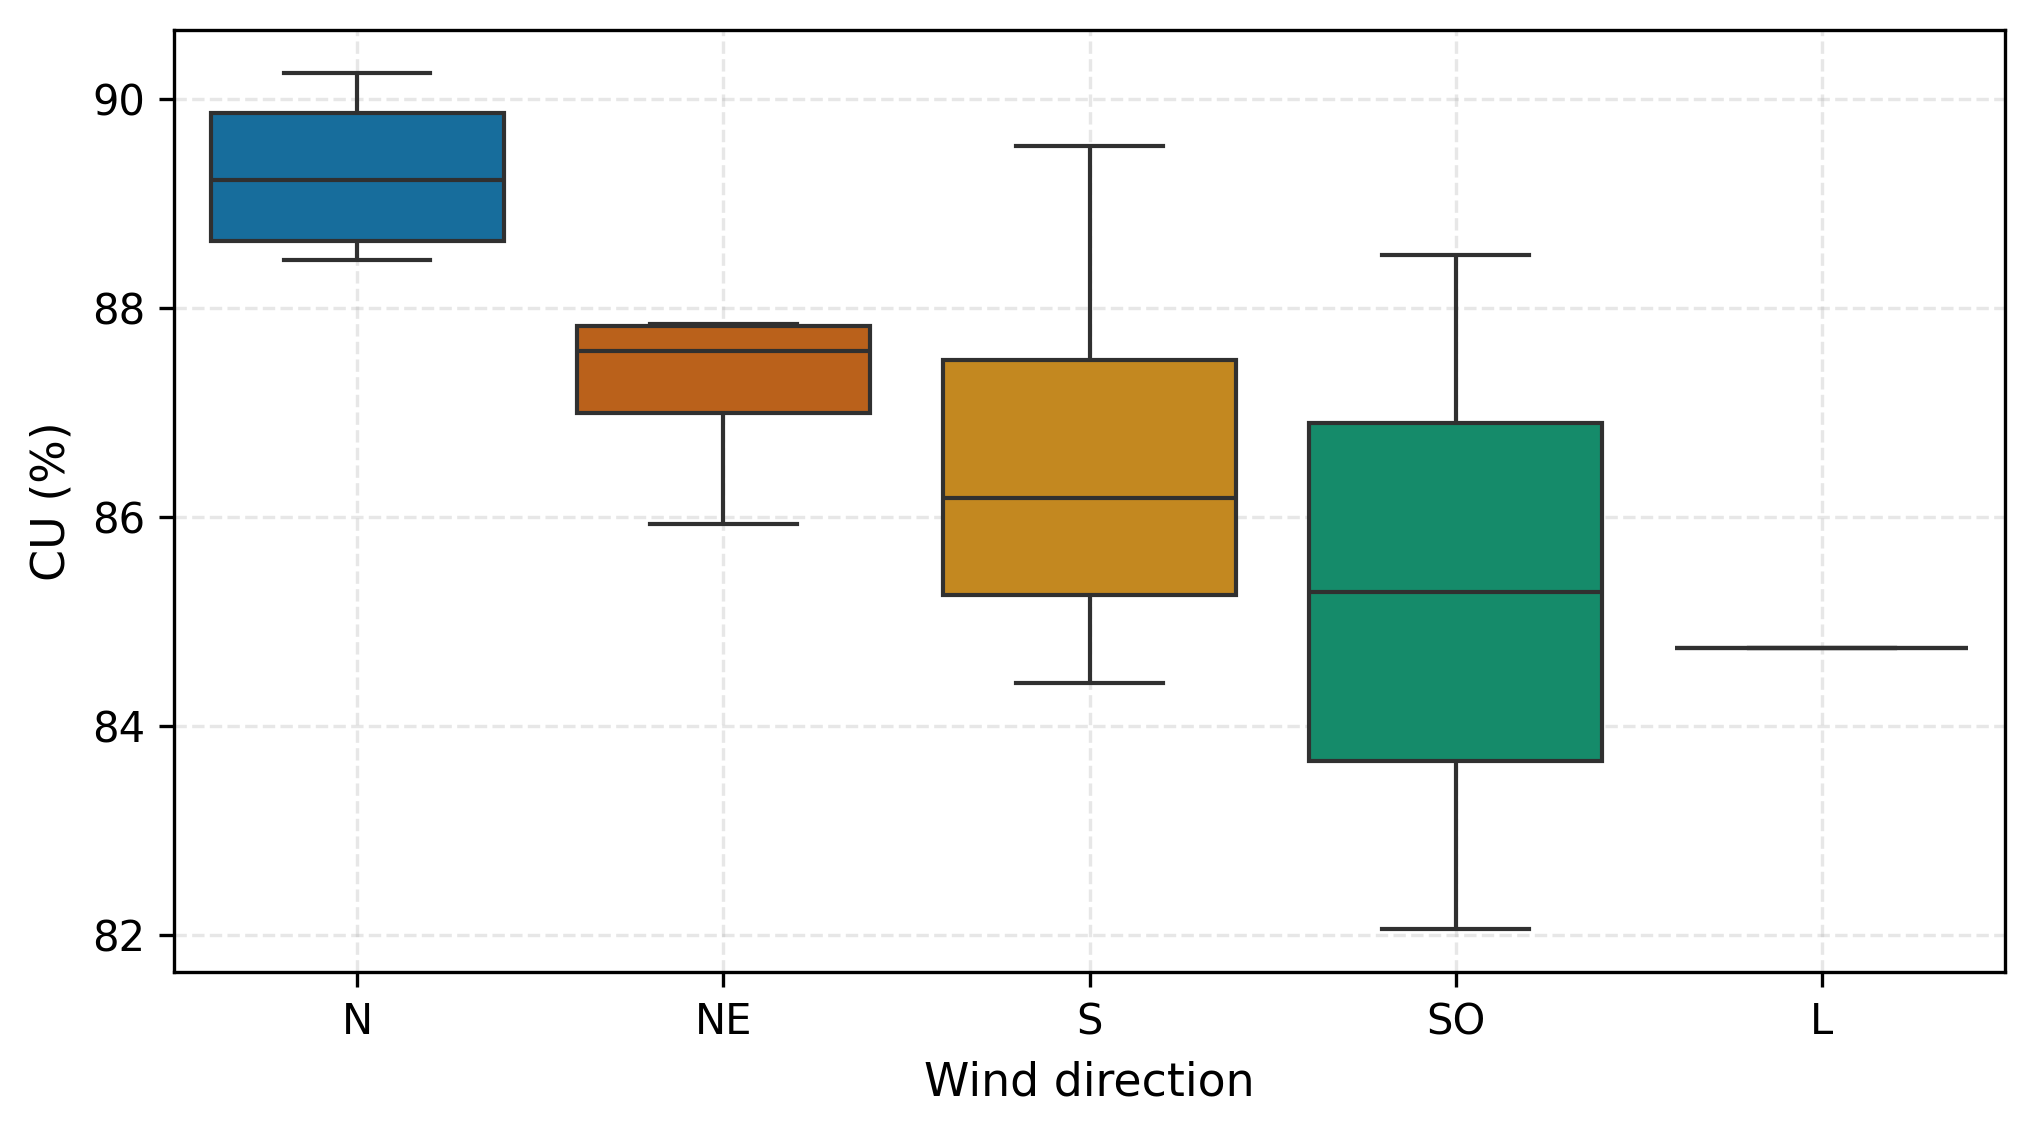

In [ ]:
# 6. Plotar o boxplot agrupado por direção cardeal
# NOTA: O figsize está em polegadas. Para 300 DPI:
# - Largura min: 789px / 300dpi = 2.63 pol (≈ 6.7cm)
# - Largura max: 2250px / 300dpi = 7.5 pol (≈ 19cm)
# - Altura max: 2625px / 300dpi = 8.75 pol (≈ 22.2cm)

# Dimensões recomendadas com margem de segurança
fig_width = 7.0  # polegadas (resulta em 2100px a 300dpi - dentro do limite!)
fig_height = 4.0  # polegadas (resulta em 1200px a 300dpi - dentro do limite!)

# Criar figura com dimensões controladas
plt.figure(figsize=(fig_width, fig_height), dpi=300, facecolor='white')

# Plotar o boxplot
sns.boxplot(data=df, x='DirecaoCardeal', y='CUC',
            order=['N','NE','S','SO','L'],
            palette='colorblind',
            hue='DirecaoCardeal',
            legend=False)

# Configurações de estilo
plt.title("")
plt.ylabel("CU (%)", fontsize=11)
plt.xlabel("Wind direction", fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')

# Ajustar layout para garantir que todos os elementos caibam
plt.tight_layout(pad=1.5)  # Pad maior para evitar corte de labels

# Salvar a figura em formato tif com 300 dpi
plt.savefig(
    'boxplot_cuc_vento.tif',
    format='tif',
    dpi=300,
    bbox_inches='tight',  # IMPORTANTE: remove espaços em branco extras
    pad_inches=0.2,       # Padding controlado
    facecolor='white',    # Garantir fundo branco
    edgecolor='none',
    transparent=False
)

# Opcional: Verificar as dimensões da imagem salva
import PIL.Image
img = PIL.Image.open('boxplot_cuc_vento.tif')
width_px, height_px = img.size
print(f"Dimensões da imagem salva: {width_px} x {height_px} pixels")
print(f"DPI da imagem: {img.info.get('dpi', 'Não especificado')}")
print(f"Largura em polegadas: {width_px/300:.2f} pol")

# Verificar se está dentro dos limites da revista
if 789 <= width_px <= 2250:
    print("✅ Largura dentro do limite (789-2250px)")
else:
    print(f"⚠️  Largura fora do limite: {width_px}px")

if height_px <= 2625:
    print("✅ Altura dentro do limite (≤2625px)")
else:
    print(f"⚠️  Altura fora do limite: {height_px}px")

plt.show()

# Task
Fix `FutureWarning` in `sns.boxplot` calls by adding `hue='Sentido'` and `legend=False` in cells `d9AseXgfrHSC` and `0d785609`.

## Fix sns.boxplot warnings in d9AseXgfrHSC

### Subtask:
Modify cell `d9AseXgfrHSC` to include `hue='Sentido'` and `legend=False` in both `sns.boxplot` calls to address the `FutureWarning`.


**Reasoning**:
To resolve the `FutureWarning` in cell `d9AseXgfrHSC`, I will modify the two `sns.boxplot` calls by explicitly setting `hue='Sentido'` and `legend=False` as suggested by the warning message.



## Fix sns.boxplot warnings in 0d785609

### Subtask:
Modify cell `0d785609` to include `hue='Sentido'` and `legend=False` in the `sns.boxplot` call to address the `FutureWarning`.

#### Instructions
1. Go to cell `0d785609`.
2. In the `sns.boxplot` call, add the arguments `hue='Sentido'` and `legend=False`.
3. Run the modified cell to apply the changes and confirm the warnings are resolved.

**Reasoning**:
To resolve the `FutureWarning` in cell `0d785609`, I will modify the `sns.boxplot` call by explicitly setting `hue='Sentido'` and `legend=False` as suggested by the warning message.



## Summary:

### Data Analysis Key Findings
*   All `FutureWarning` messages related to `sns.boxplot` calls in cells `d9AseXgfrHSC` and `0d785609` were successfully resolved.
*   The resolution was achieved by consistently adding the arguments `hue='Sentido'` and `legend=False` to the `sns.boxplot` function calls in both cells.
*   After the modifications, plots were generated without any `FutureWarning` messages in the output, confirming the successful completion of the task.

### Insights or Next Steps
*   It is crucial to address warnings in code to ensure compatibility with future library versions and maintain robust applications.
*   Review other plotting functions, especially those from `seaborn`, across the codebase to identify and proactively resolve similar warnings or deprecated usage patterns.
